In [19]:
import pandas as pd
import folium
import json
import branca
import numpy as np
import requests
from folium import plugins
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
from plotnine import *

import matplotlib.pyplot as plt

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [4]:
store2020 = pd.read_csv('store2020.csv')
store2020.head()

,adress,Latitude,Longitude,구,year,Q,store_type_code,store_type,adress_code,service_type_code,...,time6_count,male_count,female_count,age10_count,age20_count,age30_count,age40_count,age50_count,age60_count,store_count
0,계동길,37.580942,126.986728,종로구,2020.0,1.0,A,골목상권,1000001.0,CS100001,...,345.0,8752.0,7776.0,611.0,3828.0,4356.0,3428.0,2614.0,1690.0,19.0
1,계동길,37.580942,126.986728,종로구,2020.0,1.0,A,골목상권,1000001.0,CS100002,...,0.0,592.0,694.0,145.0,368.0,240.0,368.0,96.0,69.0,1.0
2,계동길,37.580942,126.986728,종로구,2020.0,1.0,A,골목상권,1000001.0,CS100003,...,241.0,622.0,508.0,0.0,134.0,245.0,275.0,314.0,162.0,3.0
3,계동길,37.580942,126.986728,종로구,2020.0,1.0,A,골목상권,1000001.0,CS300015,...,0.0,23.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,3.0
4,계동길,37.580942,126.986728,종로구,2020.0,1.0,A,골목상권,1000001.0,CS100004,...,33.0,1281.0,2014.0,5.0,1361.0,1116.0,331.0,325.0,157.0,3.0


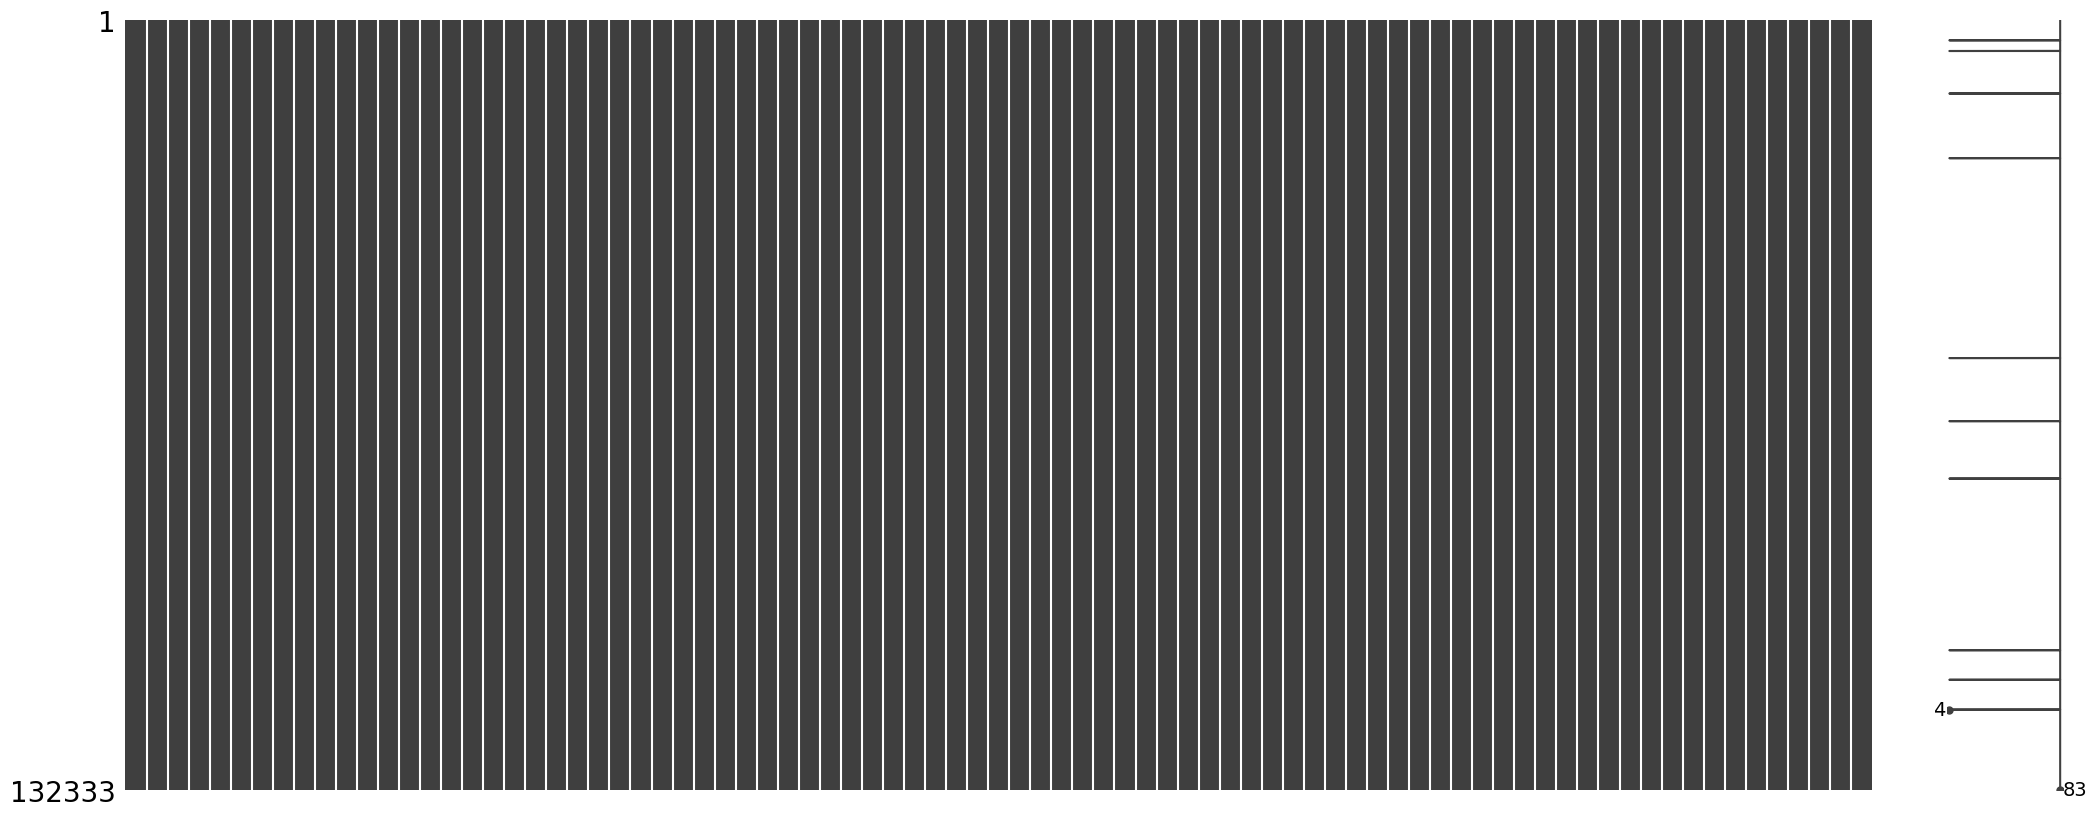

In [16]:
#결측치 확인
msno.matrix(store2020)
plt.show()

In [31]:

m = folium.Map(location = [store2020['Latitude'].sum(), store2020['Longitude'].sum()], zoom_start = 12)

for n in store2020.index:
    #팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = store2020.loc[n, '구']  + ' - ' + store2020.loc[n, 'adress']      # 원하는 문자열 추가시에만
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if store2020.loc[n, 'store_type'] == '골목상권': # 마크에 원하는 색상을 넣고싶을때
        icon_color = 'green'
    else:
        icon_color = 'blue'
        
    folium.features.CircleMarker(
        location = [store2020['Latitude'], store2020['Longitude']],
        radius = 3,
        popup=popup_name,
        color = 'blue',
        fill=True,
        fill_color= 'blue'
    ).add_to(m)
        
m

ValueError: Location should consist of two numerical values, but 0         37.580942
1         37.580942
2         37.580942
3         37.580942
4         37.580942
            ...    
132328    37.590179
132329    37.590179
132330    37.590179
132331    37.590179
132332    37.590179
Name: Latitude, Length: 132333, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [32]:
store2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132333 entries, 0 to 132332
Data columns (total 83 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adress              132333 non-null  object 
 1   Latitude            132333 non-null  float64
 2   Longitude           132333 non-null  float64
 3   구                   132333 non-null  object 
 4   year                132321 non-null  float64
 5   Q                   132321 non-null  float64
 6   store_type_code     132321 non-null  object 
 7   store_type          132321 non-null  object 
 8   adress_code         132321 non-null  float64
 9   service_type_code   132321 non-null  object 
 10  service_type        132321 non-null  object 
 11  Q_sale              132321 non-null  float64
 12  Q_count             132321 non-null  float64
 13  week_proportion     132321 non-null  float64
 14  weekend_proportion  132321 non-null  float64
 15  Mon_proportion      132321 non-nul